In [2]:
import numpy as np
from IPython.display import Audio
from matplotlib import pyplot as plt
import soundfile as sf
import scipy.signal as sig
import torch

In [132]:
def truncate_ir_silence(ir, sample_rate, threshold_db=20):

    # Normalize the data if necessary
    ir = ir / torch.max(torch.abs(ir))

    # Find the peak value
    peak_value = torch.max(torch.abs(ir))

    # Calculate the threshold (20 dB below the peak)
    threshold_value = peak_value / (10 ** (threshold_db / 20))

    # Find the peak index
    peak_index = torch.argmax(torch.abs(ir))

    # Find the last sample before the peak that is within the threshold
    above_threshold_indices = torch.where(torch.abs(torch.abs(ir[:peak_index])) >= threshold_value)[0]
    if len(above_threshold_indices) == 0:
        last_sample_index = 0
    else:
        last_sample_index = above_threshold_indices[-1].item()

    # Truncate the initial silence
    truncated_ir = ir[last_sample_index:]

    return truncated_ir

rir1.shape=torch.Size([11136])
rir2.shape=torch.Size([11135])


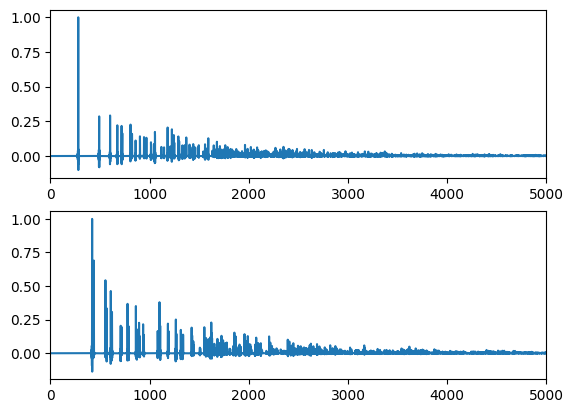

In [133]:

# load rirs with initial silence:
rir1, fs_rir= sf.read('audios/rir_with_silence1.wav')
rir2, fs_rir= sf.read('audios/rir_with_silence2.wav')

plt.figure()
plt.subplot(2,1,1)
plt.plot(rir1)
plt.xlim((0,5000))
plt.subplot(2,1,2)
plt.plot(rir2)
plt.xlim((0,5000))
plt.show

# move rirs to tensors:
rir1=torch.tensor(rir1)
rir2=torch.tensor(rir2)

print(f"{rir1.shape=}")
print(f"{rir2.shape=}")


In [140]:
rir1_trunc=truncate_ir_silence(rir1, 48000, threshold_db=20)
rir2_trunc=truncate_ir_silence(rir2, 48000, threshold_db=20)

plt.figure()
plt.subplot(2,1,1)
plt.plot(rir1_trunc)
plt.xlim((-100,500))
plt.subplot(2,1,2)
plt.plot(rir2_trunc)
plt.xlim((-100,500))
plt.show

TypeError: abs(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [139]:
# check if the truncation is perceivable

rir1, fs_rir= sf.read('audios/rir_with_silence1.wav')
signal, fs_signal = sf.read('audios/speech_VCTK_4_sentences.wav')


signal_rir1=sig.fftconvolve(signal,rir1, 'full', 0)
signal_rir1_trunc=sig.fftconvolve(signal,rir1_trunc, 'full', 0)
signal_rir2=sig.fftconvolve(signal,rir2, 'full', 0)
signal_rir2_trunc=sig.fftconvolve(signal,rir2_trunc, 'full', 0)

display(Audio(signal_rir1,rate=fs_rir))
display(Audio(signal_rir1_trunc,rate=fs_rir))